In [1]:
%cd ..

/Users/eli/AnacondaProjects/numpyro_template


In [2]:
import hydra
import math
import matplotlib.pyplot as plt
import jax
import numpy as np
import numpyro
from omegaconf import OmegaConf
import rootutils
import sys

In [3]:
from src import test, train

In [4]:
with hydra.initialize(version_base="1.3", config_path="../configs", job_name="eval"):
    cfg = hydra.compose(config_name="eval.yaml", overrides=["ckpt_path=logs/train/runs/2025-06-17_23-48-55/saved/checkpoint-epoch100.npy", "hydra.runtime.output_dir=logs/test"], return_hydra_config=True)
    hydra.core.hydra_config.HydraConfig.instance().set_config(cfg)
    metrics, objects = test.test(cfg)

In [5]:
for data, target in objects['datamodule'].test_dataloader():
    recons = objects['monad'](data)['obs'].mean(axis=0).reshape(data.shape[0], 1, 28, 28)
    break

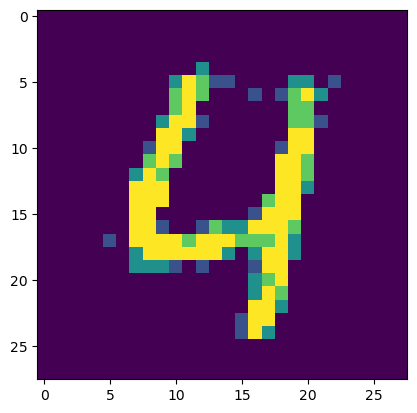

In [6]:
plt.imshow(recons[0].squeeze())

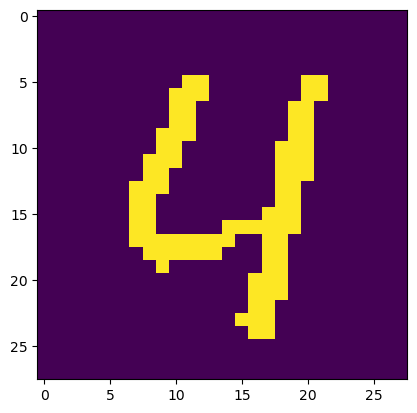

In [7]:
plt.imshow(data[0].squeeze())